### 백만원의 원금(principal)을 연 3% 단리(simple interest)로 예금에 투자하면 3년후에는 얼마가 될까?

In [1]:
P=10**6
i=0.03
n=3

# Future value
F=P*(1+i*n)
print('단리법에 의한 미래가치:',F)

단리법에 의한 미래가치: 1090000.0


### 백만원의 원금(principal)을 연간 명목이자율 3% 일복리(Daily compounding interest)를 주는 증권사 CMA에 투자하면 3년 후에는 얼마가 될까?

In [2]:
P=10**6
i=0.03
n=3

# Future value
F=P*(1+i/365)**(365*3)
print('일 복리법에 의한 미래가치:',F)

일 복리법에 의한 미래가치: 1094170.2369885808


In [3]:
P=10**6
i=0.03
n=3

# Furture value
F=P*(1+i/(365*24))**(365*24*3)
print('1시간단위 복리법에 의한 미래가치:',F)

1시간단위 복리법에 의한 미래가치: 1094174.1150821922


In [4]:
# Continuous Compounding
from sympy import limit,symbols,oo

n=symbols('n',real=True)
# Furture value
F=limit(P*(1+i/n)**(n*3),n,oo)
print('연속 복리법에 의한 미래가치:',F.evalf())

연속 복리법에 의한 미래가치: 1094174.28370521


In [5]:
from sympy import exp

P*exp(3*i)

1094174.28370521

In [6]:
# 자연상수 확인
limit((1+1/n)**n,n,oo)

E

In [7]:
limit((1+n)**(1/n),n,0)

E

In [8]:
# 1년 후 Future value
F=P*(1+i/365)**(365*1)
print('일 복리법에 의한 미래가치:',F)

일 복리법에 의한 미래가치: 1030453.263600551


### Find the corresponding effective rates for 3% compounded monthly.

In [9]:
n,rn=12,0.03

re=(1+rn/n)**n-1
print('effective rate:', re)

effective rate: 0.030415956913506736


### A young couple has made a nonrefundable deposit of the first month’s rent equal to 1,000 on a 6-month apartment lease. The next day they find a different apartment that they like just as well, but its monthly rent is only 900. They plan to be in the apartment only 12 months. Should they switch to the new apartment? Assume an interest rate of 12%.

In [10]:
def NPV_CF(CF,r):
    # CF는 매 기간의 초에 발생하는 것으로 가정
    # r은 매 기간 말에 해당하는 금리 가정
    n=len(CF)
    npv=0
    for i in range(n):
        npv += CF[i]/(1+r)**i
    return npv

In [11]:
import numpy as np

rm=0.01 # monthly interest rate
CF1=1000*np.ones(12)
CF2=900*np.ones(12)
CF2[0]=1900 # 첫달 cash outflow 수정
print('첫번째 대안의 NPV:',NPV_CF(CF1,rm))
print('두번째 대안의 NPV:',NPV_CF(CF2,rm))

첫번째 대안의 NPV: 11367.628248219475
두번째 대안의 NPV: 11230.865423397529


### 현재 시점에서 2를 투자하면 1년 후에는 1, 2년 후에는 1, 3년 후에는 1의 현금흐름이 발생한다고 한다. 이 투자의 수익율은 얼마라고 할 수 있을까?

In [ ]:
from sympy import symbols, solve

# 변수 정의
irr = symbols('irr', real=True)

# 현금흐름 방정식 (NPV = 0)
NPV = -2 + 1/(1+irr) + 1/(1+irr)**2 + 1/(1+irr)**3

# IRR 계산
IRR = solve(NPV, irr)

# IRR의 결과는 허수해 2개를 포함하고 있음
print("내부수익률:", IRR[2].evalf())

내부수익률: 0.233751928528259


In [ ]:
IRR

[-5/6 + (-1/2 - sqrt(3)*I/2)*(sqrt(417)/72 + 8/27)**(1/3) + 7/(36*(-1/2 - sqrt(3)*I/2)*(sqrt(417)/72 + 8/27)**(1/3)),
 -5/6 + 7/(36*(-1/2 + sqrt(3)*I/2)*(sqrt(417)/72 + 8/27)**(1/3)) + (-1/2 + sqrt(3)*I/2)*(sqrt(417)/72 + 8/27)**(1/3),
 -5/6 + 7/(36*(sqrt(417)/72 + 8/27)**(1/3)) + (sqrt(417)/72 + 8/27)**(1/3)]

In [ ]:
# conda install -c conda-forge numpy-financial
import numpy_financial as npf

CF=[-2,1,1,1] # 현금흐름 정의
npf.irr(CF) # 내부수익율구하기

0.23375192852825877

In [16]:
def bnd_irr(price, coupon_rate, freq, maturity, face_value):
    import sympy as sp
    import numpy as np
    import pandas as pd

    r = sp.symbols('r', positive=True)

    # freq: 연 쿠폰 지급횟수
    period = 1 / freq

    T = np.arange(period, maturity + 0.001, period)
    nT = np.arange(1, len(T) + 1)
    Disc = 1 / (1 + r) ** nT  # 할인율 적용

    # 현금흐름 계산
    coupons = coupon_rate * face_value
    CF = np.array([coupons / freq] * len(T))
    CF[-1] += face_value  # 만기 원금 상환

    # 할인 현금흐름
    Disc_CF = CF * Disc  # Discounted Cash Flow

    # 데이터프레임으로 보기
    df = pd.DataFrame({
        'Time': T,
        'CashFlow': CF,
        'DF': Disc,
        'Disc_CF': Disc_CF
    })

    print(df)

    # 합계 조건
    col_sum = df.sum(axis=0)
    SumP = col_sum['Disc_CF']
    eq = price - SumP

    sol = sp.solve(eq, r)
    sol=sol[0]*freq # 연이율로 복원

    return sol

bnd_irr(97,0.05,2,5,100)

   Time  CashFlow              DF            Disc_CF
0   0.5       2.5       1/(r + 1)        2.5/(r + 1)
1   1.0       2.5   (r + 1)**(-2)     2.5/(r + 1)**2
2   1.5       2.5   (r + 1)**(-3)     2.5/(r + 1)**3
3   2.0       2.5   (r + 1)**(-4)     2.5/(r + 1)**4
4   2.5       2.5   (r + 1)**(-5)     2.5/(r + 1)**5
5   3.0       2.5   (r + 1)**(-6)     2.5/(r + 1)**6
6   3.5       2.5   (r + 1)**(-7)     2.5/(r + 1)**7
7   4.0       2.5   (r + 1)**(-8)     2.5/(r + 1)**8
8   4.5       2.5   (r + 1)**(-9)     2.5/(r + 1)**9
9   5.0     102.5  (r + 1)**(-10)  102.5/(r + 1)**10


0.0569797291000285

### 1년 만기 5% 쿠폰의 채권은 95.24, 2년 만기 6% 쿠폰의 채권은 90.70, 3년만기 6.5% 쿠폰의 채권은 85에 거래되고 있다. 모두 할인채라고 할 때, 이 시점에서의 zero curve를 만들어 보아라.

In [ ]:
def bootstrap_zero_rates():
    CFs = {
        1: {'coupon': 5, 'price': 95.24},
        2: {'coupon': 6, 'price': 90.70},
        3: {'coupon': 6.5, 'price': 85.00}
    }

    zero_rates = {}

    # 1년물: 단순히 역산
    P1 = CFs[1]['price']
    C1 = CFs[1]['coupon'] + 100
    r1 = (C1 / P1) - 1
    zero_rates[1] = r1

    # 2년물: 1년 할인율 이용
    P2 = CFs[2]['price']
    C2 = CFs[2]['coupon']
    total = C2 / (1 + r1)
    r2 = ((100 + C2) / (P2 - total))**(1/1) - 1
    zero_rates[2] = r2

    # 3년물: 1, 2년 할인율 모두 이용
    P3 = CFs[3]['price']
    C3 = CFs[3]['coupon']
    total = (C3 / (1 + r1)) + (C3 / (1 + r2)**2)
    r3 = ((100 + C3) / (P3 - total))**(1/1) - 1
    zero_rates[3] = r3

    return zero_rates

In [ ]:
# 실행
zeros = bootstrap_zero_rates()
for year, rate in zeros.items():
    print(f"{year}년 만기 Zero Rate: {rate:.4%}")

1년 만기 Zero Rate: 10.2478%
2년 만기 Zero Rate: 24.3289%
3년 만기 Zero Rate: 42.1912%


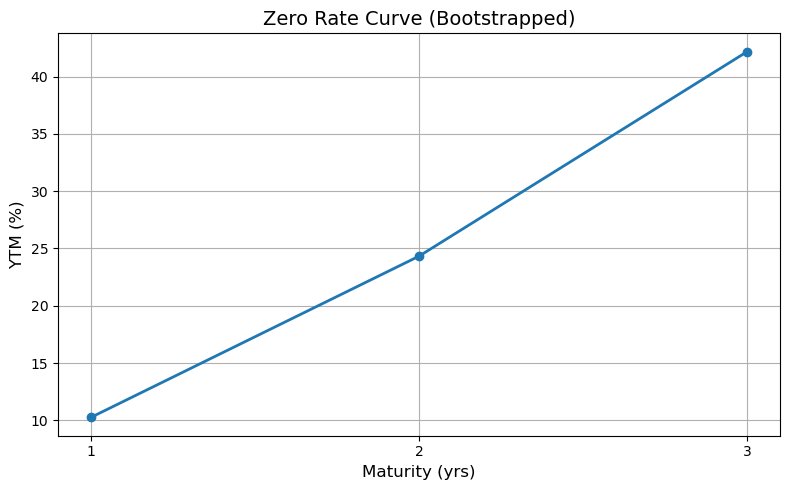

In [ ]:
import matplotlib.pyplot as plt

# 데이터 분리
years = list(zeros.keys())
rates = [zeros[yr] * 100 for yr in years]  # 퍼센트로 변환

# 그래프 그리기
plt.figure(figsize=(8, 5))
plt.plot(years, rates, marker='o', linestyle='-', linewidth=2)
plt.title("Zero Rate Curve (Bootstrapped)", fontsize=14)
plt.xlabel("Maturity (yrs)", fontsize=12)
plt.ylabel("YTM (%)", fontsize=12)
plt.grid(True)
plt.xticks(years)
plt.tight_layout()
plt.show()